### Homework 6 - Pandas and basically bioinformatics
### BIOINF 575 - Fall 2021

##### Total 70 points 

SOLUTION


For each each problem part provide the solution in Code cells after the description of the problem part.
Answers to questions should be written either as comments together with the code or in Markdown cell(s) for each part of the problem.

This homework will require the use of numpy arrays.


<img src = "https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png" width = 500/>

https://www.geeksforgeeks.org/python-pandas-dataframe/

______
#### Problem 1 - Exploring time course gene expression data 
##### Identify the time interval with the most changed genes
##### 20 points


The file <b>GSE22955_small_gene_table.txt</b> contains gene expression data for about 10000 genes during treatment of breast cancer cells  with a HER2 inhibitor data was collected at every three hours for 45 hours.   
The file contains tab-separated data, has a header that contains the time points and row labels on the first column that are gene symbols.   
More details at: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22955




..................................................................................................

<b>Part 1 (12 points)</b> - Select the genes that have the same pattern of expression as BRCA1


Select the genes that have a Pearson correlation coefficient with BRCA1 > 98%. The genes that are highly correlated with BRCA1 might be part of the same biological mechanism (might be involved in the same biological process).
- <b>(1 points)</b> Read the data from the file into a pandas data frame
- <b>(2 points)</b> Plot the expression of the gene BRCA1 over time (scatter plot and line plot)
    - subset the dataframe to select the row for BRCA1 from the dataset 
    - use the plot functionality for a pandas series to plot the data
- <b>(7 points)</b> For each gene in the dataset, compute the Pearson correaltion coefficient between the expression of the gene over time and the expression of BRCA1 over time 
    - You can use the scipy.stats.pearsonr function (recommended) or use the numpy.corrcoef function
        - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html 
        - https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
    - if you use the scipy.stats.pearsonr  you can create a function that returns only the correlation coeeficient between to arrays of the same size (the pearsonr function returns a tuple that includes the p-value), then use the apply method on the initial dataframe together with the function that you just created to compute the correaltion between each row of the dataframe and the expression of BRCA1
    - if you use the numpy.corrcoef function on the dataframe, it will return a matrix (2D numpy array) that contains the correlation coefficient between every pair of genes, then select the column for the BRCA1 gene (add the gene symbols as labels by creating a pandas series) 
- <b>(2 points)</b> Select from the series withthe correlation data only the values (and associated labels, gene symbols) that have the correaltion coefficient > 98%

In [2]:
# Write your solution here, feel free to add new cells.
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
# help(pearsonr)

In [4]:
# help(np.corrcoef)  

In [5]:
#reading the data from the file into a pandas dataframe. 
gene_DF = pd.read_csv("GSE22955_small_gene_table.txt", sep = "\t", comment = "#", index_col = 0)
gene_DF

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


In [6]:
type(gene_DF)

pandas.core.frame.DataFrame

In [7]:
#subsetting the dataframe to select the row for BRCA1 from gene_DF. 
import_gene = "BRCA1"
BRCA1_PS = gene_DF.loc[import_gene,:] 
BRCA1_PS

0      9.940983
3     10.037104
6     10.061594
9      9.833829
12     9.139316
15     8.980142
18     8.951006
21     8.806894
24     9.003011
27     8.885428
30     8.816547
33     8.724686
36     8.402657
39     8.386593
42     8.396024
45     8.605764
Name: BRCA1, dtype: float64

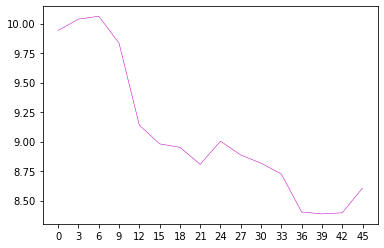

In [8]:
#Plot the expression of the gene BRCA1 over time (line plot below).
x = BRCA1_PS
plt.plot(x, color = "m", linestyle = "-", linewidth = 0.5, markersize = 5)
plt.show()

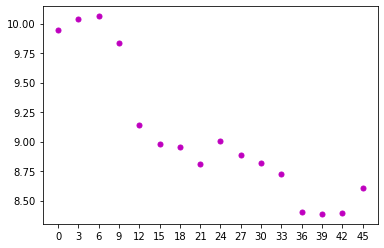

In [9]:
#the scatter plot shown below.
x = BRCA1_PS
plt.plot(x, color = "m", marker = "o", linestyle = "", linewidth = 0.5, markersize = 5)
plt.show()

In [17]:
#For each gene in the dataset, compute the Pearson correaltion coefficient between the expression of 
#the gene over time and the expression of BRCA1 over time
#I indexed my tuple for first index because that is where my coefficient is located. 
def pearson_coef_work(DF_start, y):
    return pearsonr(DF_start, y)[0]  

In [18]:
#goes through each row or column and does it cross. I want rows so I need to use axis = 1.  
pearson_coef = gene_DF.apply(pearson_coef_work, y = gene_DF.loc["BRCA1"], axis = 1)
pearson_coef

Symbol
ABCA1    -0.877346
ABCC11    0.969999
ABCC3     0.796719
ABLIM1   -0.905117
ABP1     -0.804874
            ...   
ZNF606   -0.834368
ZNF616   -0.735252
ZNF83    -0.907524
ZNFX1    -0.835666
ZWINT     0.960608
Length: 1175, dtype: float64

In [69]:
#Select from the series with the correlation data only the values (and associated labels, gene symbols) 
#that have the correaltion coefficient > 98%
pearson_coef_2 = pearson_coef > 0.98
pearson_coef[pearson_coef_2]

Symbol
ATAD2        0.987425
BLM          0.987916
BRCA1        1.000000
C1orf112     0.988358
CDC45L       0.984325
CENPM        0.983923
CHEK1        0.983598
E2F2         0.987843
EXO1         0.995347
FLJ13912     0.985851
FLJ20647     0.993736
KDELC2       0.992639
KREMEN2      0.986672
MCM7         0.981542
MGC24665     0.988778
MNS1         0.988803
NY-SAR-48    0.990424
Pfs2         0.989485
RFC4         0.990404
RNASEH2A     0.992844
STMN1        0.982093
TIMELESS     0.980528
TMPO         0.984384
UBE2T        0.990075
dtype: float64

..................................................................................................

<b>Part 2 (8 points)</b> - Identify the gene most anticorrelated with BRCA1 and display the expression  data over time 

Identify the gene that has the lowest negative correlation with the BRCA1 gene and plot the expression of BRCA1 and the expression of the selected gene in the same plot (one line for each gene)
- <b>(5 points)</b> Select the gene with the minimum value (has to be negative) fror the correlation (Pearson coefficient) with the expression of the BRCA1 gene
- <b>(3 points)</b> Display the expression of the two genes (min corr gene and BRCA1) in a the same plot (expression over time, one line for each gene)

In [70]:
# Write your solution here, feel free to add new cells.
#will give me the minimum value for the correlation with the expression of BRCA1 gene. 
#and it's negative.
pearson_coef.min()

-0.978881390288951

In [71]:
#will give me the gene name for the min value. 
pearson_coef.idxmin()

'GLYATL2'

In [72]:
#just confirming here and we're good. 
pearson_coef["GLYATL2"]

-0.978881390288951

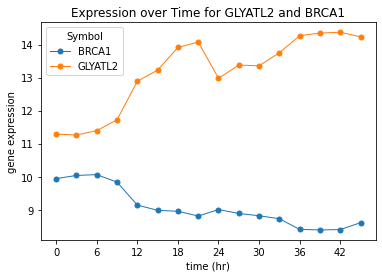

In [73]:
#graphing the expressin of BRCA1 and GLYATL2 together on one plot.
gene_DF.loc[("BRCA1", pearson_coef.idxmin()), :].T.plot(marker = 'o', linestyle = '-', linewidth = 1, markersize = 5)
plt.ylabel('gene expression')
plt.xlabel('time (hr)')
plt.title("Expression over Time for GLYATL2 and BRCA1")
plt.show()

______

#### Problem 2 - process genomic data to compute variant calls between a tumor and a normal sample
##### 50 points

#### You have to fill in the code for 4 functions as instructed below.

.....................................................................

#### The Data
A description of the provided data are:
1. `b_subtilis_genome.fa`: A [FASTA format](https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=BlastHelp) file containing the reference sequence for _B. subtilis_
    * A hallmark of the FASTA format is that the sequence header line precedes the sequences and always begins with a '>' character
1. `normal.bam`: A [BAM format](https://samtools.github.io/hts-specs/SAMv1.pdf) file that contains the simulated short reads for a "normal" _B subtilis_ sample
    * This is a very specialized format that needs special libraries to parse. However, just think of it as one read per line
    * Documentation for the SAM/BAM format: 
        * https://samtools.github.io/hts-specs/SAMv1.pdf
1. `normal.bam.bai`: A BAM index file used for random access
1. `tumor.bam`: A [BAM format](https://samtools.github.io/hts-specs/SAMv1.pdf) file that contains the simulated short reads for a "tumor" _B subtilis_ sample
1. `tumor.bam.bai`: A BAM index file used for random access

<div style="background-color:#ffc680">
  <h3>Important Note</h3>
  <p>You will be using a special Python library for handling this data. This package is called BAMnostic.</p>
    <p><b>Before</b> doing this homework problem, you will need to install BAMnostic.  <br>  
        To do so, go to your terminal and type:<code>conda install -c conda-forge bamnostic</code></p> 
  <p>Consider taking a look at the <a href="https://bamnostic.readthedocs.io/en/latest/?badge=latest">BAMnostic documentation</a> for more information. <br>      
The code in the following cell should run without issues if bamnostic was installed successfully.</p>
</div>

In [28]:
import bamnostic as bs

---
### Instructions

This problem is designed to be as close to real genomics research as you can get without the math/stats/research.   
**Given a set of genomic files you will compute the genomic variants between a tumor and a normal biological sample.**

You are tasked to serially process both the `normal.bam` and `tumor.bam` sample files which contain aligned reads.  

For each position on the genome, you will track:
   * the counts of each base observed at that position (`counts`)  
   * the consensus base at that position (`consensus`) 
   
In the end you will have a list of variants defined by their position in the genome, nucleotide in the normal sample, nucleotide in the tumor sample and the frequency of the nucleotide at that position in the tumor sample.






Using `bamnostic` you will iterate through the files (`normal.bam` and `tumor.bam`) <b>one read at a time and actually construct the alignment in a dictionaly structure that will keep two lists to monitor the positions of the normal and tumor genomes. </b>   
The problem is set up so that you do not have to worry about dealing with `bamnostic` directly.  


<div style="background-color:#ffc680">
  <h3>Important Note</h3>
    <p>You <b>only</b> need to use <code>read.seq</code> and <code>read.pos (which is 0-based)</code> to complete this assignment</p>
    <p>You <b>do not</b> have to consider other read attributes (<em>qualities, flags, or CIGAR strings</em>) at this time</p>
</div>

The data structure you will be using is a dictionary that looks like this:</br>

```python
genome_positions = {"normal": [...], "tumor": [...]}

# The length of the two lists is the same and should be equal to the length of the genomic sequence.
# that is, the number of ACGTs in the b_subtilis_genome.fa file
# The position in the list represents the genomic positions for the normal and tumor sample. 
# So each position in the list corresponds to a position in the genome.

# In each list element we want to keep track what bases/nucleotides aligned at that position in the 
# genome from each of the reads that cover that position
# See towards the end an example with Counter
# Every element in the list for the 'normal' and 'tumor' keys in genome_positions 
# each element is a dictionary as follows:

{ 'counts': Counter(),  # Count of observed bases at this position 
  'consensus': ''}      # The most common/frequent base at this position
    
```

#### A visualization of the read alignment and how the 'normal' and 'tumor' lists in our dictionary come into play. 

For the read "TAC" the read.pos is 1 and the read.seq is "TAC".    
T aligns at position 1, A at position 2, and C at position 3.
Assume that the genomic positions 

<img src = "data_structure.png" width = 300/>

#### An example of how the processing of the reads works using the data in the figure above:      
After we initialize our data for a genome of size 5, we have the following genome_positions:


```python
{'normal': [{'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''}], 
 'tumor':  [{'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''}]
}

```

After we process the first read, "TAC" for the normal sample, the genome_positions will be:

```python
{'normal': [{'counts': Counter(),'consensus': ''},
            {'counts': Counter({'T':1}),'consensus': 'T'},
            {'counts': Counter({'A':1}),'consensus': 'A'},
            {'counts': Counter({'C':1}),'consensus': 'C'},
            {'counts': Counter(),'consensus': ''}], 
 'tumor':  [{'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''}]
}    


```


After all 5 reads are processed, the genome_positions will be:

```python
{'normal': [{'counts': Counter({'A':1}),'consensus': 'A'},
            {'counts': Counter({'T':1, 'A':1, 'C':1}),'consensus': 'T'},
            {'counts': Counter({'A':2, 'G':1, 'C':1}),'consensus': 'A'},
            {'counts': Counter({'C':2, 'T':1}),'consensus': 'C'},
            {'counts': Counter({'G':1}),'consensus': 'G'}], 
 'tumor':  [{'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''},
            {'counts': Counter(),'consensus': ''}]
}    


```



---
#### Fill in the code for the following 4 functions

#### (10 points) FUNCTION 1 - Initialize the genome_positions  - fill in the code missing in the following cell
   `initialize_positions`:
   * Input:
        * genome filename
   * Output:
        * initialized `genome_positions`  object

#### Details and score breakdown:
- The length of the two lists (values for the keys 'normal' and 'tumor' ) is the same and should be equal to the length of the sequence 
     in the genome_filename (b_subtilis_genome.fa) file
- After calling this function, the normal and tumor lists should contain the following dictionary
     {'counts': Counter(), 'consensus': ''} for each position
- In this function 
     - <b>(1 points)</b> open the file and 
     - <b>(1 points)</b> go through it line by line 
     - <b>(3 points)</b> if the line is a sequence line (does not start with >) go through the characters in the line
     - <b>(5 points)</b> for each character (except for the newline character) add a dictionary like the one mentioned above, {'counts': Counter(),'consensus': ''}, in the normal and tumor list
         - consider that the last character in the line might be a newline character '\n' - which is not a nuvleotide in the sequence

In [49]:
# Initialize the genome_positions 
# This can be tested with a small text file that contains a small (10-100 nucleotides) 
# sequence before going to the large B. subtilis file.
# Make sure you run the import before you try to test this code
# from collections import Counter

#I tested this function with a small text file I created and it ran successfully. 

from collections import Counter 

def initialize_positions(genome_filename):
    '''
    
    This function will take your genome file and initialize every position for each character 
    in every line. The output will be a dictionary for two keys ("normal" and "tumor") and the values 
    for each key will be a list of dicationaries for each character with counts, Counter, and consensus. 
    
    '''
    genome_positions = {"normal":[], "tumor":[]}  
    #this builds the framework for my dictionary.
    with open(genome_filename) as gene_file:
    #this opens file.
        for line in gene_file:
        #this iterates through each line in the file. 
            if not line.startswith(">"):  
                #if line is a sequence line.
                for char in line.strip():  
                    #removing the white spaces (like tabs or noraml spaces) so that we don't count those as char.
                        genome_positions["normal"].append({"counts": Counter(), "consensus": ""})
                        genome_positions["tumor"].append({ "counts": Counter(),"consensus": ""})
    return genome_positions

.....................................


#### (15 points) FUNCTION 2 - Process a read - fill in the code missing in the following cell

  `process_read`:
   * Input:
        * read_pos: The position whare the read aligns
        * read_seq: The sequence of the read
        * Sample name (`'normal'` or `'tumor'`)
        * `genome_positions`
   * Output: 
        * The modified `genome_positions`


#### Details and score breakdown:
- <b>(3 points)</b> Go through the read sequence (read.seq) and update the genome_positions value for the sample_name (which will be tumor or normal)
- <b>(4 points)</b> Update the list at the positions starting with the position given by read.pos (attribute of the read object that tells us where the read aligned)
- For each nucleotide in the sequence:
    * <b>(4 points)</b> update the dictionary counter for the respective positions
    * <b>(4 points)</b> update consensus for the respective positions


- E.g.: Let's assume sample_name is normal and read.pos is 5 and read.seq is AGCT
     - Use the the genome_positions dictionary and get the value for the key 'normal' which is a list
     - Make updates to the element from the list at position 5 which is a dictionary with two keys 'counts' and 'consensus' 
         - Add A to the counter
         - Update the consensus if 'A' is not the consensus and now has a higher frequency than the consensus
     - Move to the next nucleotide in the read sequence 'G', which aligns at position 6 and follow the update process described  above.
     - Continue to go through the sequence and make similar updates to the dictionaries that are in the list at positions 7 and 8 and use the next nucleotides from the read sequence T and C  



In [51]:
# Process a read
# Make sure you run the import before you try to test this code
# from collections import Counter

#I tested this function with the example dictionary and sequences provided at the beginning of Problem #2. 
#All ran successfully. 

from collections import Counter 

def process_read(read_pos, read_seq, sample_name, genome_positions = None):
    '''
    
    This function will process a read and update the genome_positions dictionary that was 
    created in the first function, with the respective nucleotide and position (Counter)
    and consensus (obtained from the counter) for each key. 
   
    '''
    #go through the genome sequence for each character. Need a for loop to go through each nucleotide sequence. 
    #need to first find the starting position and then the length to see how long the sequence is. 
    #we can use a range and a start and ending point. 
    for char_pos in range(read_pos, read_pos + len(read_seq)):
        #but we dont' know the position with respect to the genome for each nucleotide. So we find nc. 
        nc = read_seq[char_pos - read_pos]
        genome_positions[sample_name][char_pos]["counts"].update(nc)
        con_value = genome_positions[sample_name][char_pos]["counts"].most_common(1)[0][0]
        #indexing to get the "consensus" with most_common method and setting it equal to con_value. 
        genome_positions[sample_name][char_pos]["consensus"] = con_value
        #we set the index position for consensus key in the dictionary equal to the con_value.
        
    return genome_positions

.....................................


#### (5 points) FUNCTION 3 - Process a bam file - fill in the code missing in the following cell

 `process_bam`: 
   * Input: 
        * filename to be processed
        * Sample name (`'normal'` or `'tumor'`)
        * `genome_positions`
   * Output:
        * The modified `genome_positions` given that specific sample


#### Details and score breakdown:
- Go through the bam file one read at a time (done already) and 
    - <b>(5 points)</b> process the read

In [53]:
# Process file - make sure you run the import before you try to test this function
import bamnostic as bs
def process_bam(filename, sample_name, genome_positions = None):
    '''
    This function will open the .bam alignment file, 
    put all the reads in the object named bam, and call function #2 
    to process the bam file and update the genome_positions dictionary.
    
    '''
    # the following line of code opens the .bam alignment file.
    # and puts all the reads in the object named bam.
    with bs.AlignmentFile(filename) as bam:
        #for loop to go through each read in bam. 
        for read in bam:
             process_read(read.pos, read.seq, sample_name, genome_positions)
            #I want to call function #2 since we already know set the read position and sequence in funct_2
            #I cannot use read_pos and read_seq because those are not defined in funct_3. 
            #so I use read.pos and read.seq which we can use since we're using bamnositc.                
    return genome_positions

.....................................


#### (20 points) FUNCTION 4 - Process the updated genomic data collected in genome_positions and create variant calls

 `process_genomic_data`:
   * Input: 
        * `genome_positions` 

```python
#E.g.: genome_positions
{'normal':[{'counts': {'A': 5, 'C':2, 'G':7}, 'consensus': 'G'}], 
 'tumor':[{'counts': {'A': 2, 'C':9, 'G':3, 'T':1}, 'consensus': 'C'}]}
```

   * Output: 
        * The summarized variants as a `list` of `tuples`: `(pos, cons_tumor, cons_normal, alelle_freq)`

```python
#E.g. variant_calls
[(0,'G','C',9/15)]
```

#### Details and score breakdown:

When you have finished processing the files, you will need to produce a second `list` of `tuples` (variant_calls) using the  process_data function.  

The data a `tuple`s in the variants list must contain are: `(pos, cons_tumor, cons_normal, alelle_freq)`
1. The position of the variant
1. The variant base
1. The reference base
1. The allele frequency of the variant base (counts of variant base calls/total base counts at the given position)
    - counts of variant base calls = counts of the consensus in tumor (at the given position)
    - total base counts = total counts of all bases (ACGT) in tumor (at the given position)

An element (tuple) is added to the list if and only if the following conditions is met:
> There is a different consensus base in the tumor sample versus the normal sample at the same position   
More than half of the bases aligned at that position in the tumor sample suport the consensus

    
- <b>(5 points)</b> Go though the elements of the list that is the value for the 'normal' key of the genome_positions dictionary
    - you also want the position that you can use access the same place in the tumor list so you should use enumerate to get both
- For each element: 
    - <b>(8 points) 
        - Check if there is a different consensus base in the tumor sample versus the normal sample at the same position
        - More than half of the bases aligned at that position in the tumor sample suport the consensus
    - <b>(5 points)</b> Build a variant call tuple using data from the normal sample at the respective position      
    (`genome_positions['normal'][pos]`) and the corresponding element (at the same position) in the value for the 'tumor' key (`genome_positions['tumor'][pos]`)  
    - <b>(2 points)</b> add tuple to the `variant_calls` list.

In [55]:
# Process genomic data
# This can be tested with a small made-up genome_positions dictionary
from collections import Counter
def process_data(genome_positions = None):
    '''
    This function will process the updated genomic data collected in genome_positions and 
    return variant calls which is a tuple with the position of interest, the consensus for 
    both normal and tumor at that position, and the allele frequency for tumor at that 
    position. 
    
    '''
    variant_calls = [] 
    for pos, d_normal in enumerate(genome_positions["normal"]):
        cons_normal = d_normal["consensus"]
        d_tumor = genome_positions["tumor"][pos]
        cons_tumor = d_tumor["consensus"] 
        counter_tumor = d_tumor["counts"]
        #I want the counter to "focus" on the tumor counts at this certain position. 
        if len(counter_tumor) > 0:
        #this if statement will exclude any Counters that have no values in them. 
            numerator = counter_tumor.most_common(1)[0][1]
            #numberator will total the number of the most common base. 
            denominator = sum(counter_tumor.values())
            #denominator will sum up all the values for each nucleotide at that position in tumor, counts. 
            alelle_freq = numerator/denominator
            if (cons_normal != cons_tumor) and (alelle_freq > 0.5):
            #this if statement will ensure the consensuses for normal and tumor are different from each other 
            #at the same position in the genome.  
                tup_final = (pos, cons_tumor, cons_normal, alelle_freq) 
                #built my tuple which I set equal to the variable tup_final.
                variant_calls.append(tup_final)
                #append my tup_final to my empty list called variant_calls.
    return variant_calls

---
#### This is to run all the code together after all functions are completed. 
#### The following cells should work if all the code above works.

#### I recommend to try a test with a small genome file (100 nucleotides or so) 

In [57]:
# This will take some time to run for the file provided -- 10 min
# Make sure you run the import before you try to test this code
# from collections import Counter
# import bamnostic as bs

# Initialize the list
genome_positions = initialize_positions('b_subtilis_genome.fa')

# Process all the bam files
for filename in ('normal.bam', 'tumor.bam'):
    genome_positions = process_bam(filename, filename.split('.')[0], genome_positions)

# Process the results
results = process_data(genome_positions)

# Display the first 10 variant calls
results[:10]


[(303, 'A', 'T', 1.0),
 (424, 'A', 'G', 0.625),
 (426, 'A', 'C', 0.625),
 (427, 'A', 'C', 0.625),
 (429, 'A', 'G', 0.625),
 (430, 'G', 'T', 0.625),
 (431, 'A', 'G', 0.625),
 (432, 'C', 'G', 0.625),
 (433, 'C', 'A', 0.5555555555555556),
 (434, 'T', 'A', 0.5555555555555556)]

In [64]:
len(results)

92066

In [65]:
len(genome_positions["normal"])

4215606

______________

In [60]:
## Example of how the Counter object works it is a special dictionary with the count for each key

from collections import Counter


In [61]:
from collections import Counter

c = Counter()
c.update("CAGTTACC")
print(c)
c.update("A")
print(c)
print(c.most_common)
print(c.most_common())

Counter({'C': 3, 'A': 2, 'T': 2, 'G': 1})
Counter({'C': 3, 'A': 3, 'T': 2, 'G': 1})
<bound method Counter.most_common of Counter({'C': 3, 'A': 3, 'T': 2, 'G': 1})>
[('C', 3), ('A', 3), ('T', 2), ('G', 1)]


In [62]:
help(Counter.most_common)

Help on function most_common in module collections:

most_common(self, n=None)
    List the n most common elements and their counts from the most
    common to the least.  If n is None, then list all element counts.
    
    >>> Counter('abracadabra').most_common(3)
    [('a', 5), ('b', 2), ('r', 2)]



________
_________

====================================================================
#### Extra details about the context of the problem and the data generation if you are interested - not related to the homework

#### Background

> _B. subtilis_ is a Gram-positive bacterium that is often used as a model organism in the study of bacterial chromosome replication. It is also considered to be the best studied Gram-positive bacterial.[$\^1\$](https://wickhamlabs.co.uk/technical-resource-centre/fact-sheet-bacillus-subtilis/)

We will be working with some simulated _B. subtilis_ data.   
Some key characteristics of the _B. subtilis_ genome is that it is a 4.13611 megabase (Mb) circular genome with a median [GC%](https://en.wikipedia.org/wiki/GC-content) of 43.6[$\^2\$](https://www.ncbi.nlm.nih.gov/genome/?term=Bacillus%20subtilis[Organism]&cmd=DetailsSearch).

.....................................................................
#### Methods

The data was simulated using the [Bacillus subtilis subsp. subtilis str. 168](https://support.illumina.com/sequencing/sequencing_software/igenome.html) provided by illumina's iGenomes collection.

* [ART](https://www.niehs.nih.gov/research/resources/software/biostatistics/art/) was used to simulate the short reads (`fastq` files) based on the genome above using known base calling error rates and biases within specified illumina technologies
* [SInC](https://sourceforge.net/projects/sincsimulator/files/?source=navbar) was used to modify the ART reads to simulate SNPS, CNVs, and indels within the reads
* [VarSimLab](https://github.com/NabaviLab/VarSimLab) was used to orchestrate the other technologies and generate the short reads necessary for this assignment
* [bwa](http://bio-bwa.sourceforge.net/) was used to align the reads to the reference genome
* [samtools](http://www.htslib.org/) was used to sort, merge, and index the resultant files

Assuming that all of the above software is installed correctly, the following command was used to generate the data:
>```bash
python Exome_Script.py -use_genome -c 7 -s -snp 10 -l 100 -sam output b_subtilis_genome.fa


There are two samples (normal and tumor) and the parameters in the command above mean that the samples have $\approx$ 7x coverage of $\approx$ 100 bp long reads with a SNP rate of 10% across the genome of _B. subtilis_. As this is a cancer cell line simulation workflow, the "tumor" sample should significantly differ from the "normal".